In [1]:
import numpy as np
import torch
import pandas as pd
import matplotlib.pyplot as plt
import os
os.environ["KMP_DUPLICATE_LIB_OK"]="TRUE"

In [2]:
a = np.arange(12).reshape(3,4)

In [3]:
a

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11]])

In [4]:
a.sum(axis=0)

array([12, 15, 18, 21])

In [5]:
a.sum(axis=1)

array([ 6, 22, 38])

In [6]:
b = np.arange(27).reshape(3,3,3)
b


array([[[ 0,  1,  2],
        [ 3,  4,  5],
        [ 6,  7,  8]],

       [[ 9, 10, 11],
        [12, 13, 14],
        [15, 16, 17]],

       [[18, 19, 20],
        [21, 22, 23],
        [24, 25, 26]]])

In [7]:

a.cumsum(axis=0)


array([[ 0,  1,  2,  3],
       [ 4,  6,  8, 10],
       [12, 15, 18, 21]], dtype=int32)

In [8]:
x = torch.ones(4,3)
y = torch.ones(3)
z = torch.mv(x,y)
z

tensor([3., 3., 3., 3.])

In [9]:
df1 = pd.DataFrame(np.ones((3,4))*0, columns = ['A', 'B', 'C', 'D'])
df2 = pd.DataFrame(np.ones((3,4))*1, columns = ['A', 'B', 'C', 'D'])
df3 = pd.DataFrame(np.ones((3,4))*2, columns = ['A', 'B', 'C', 'D'])
df1



,A,B,C,D
0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0


In [10]:
df2

,A,B,C,D
0,1.0,1.0,1.0,1.0
1,1.0,1.0,1.0,1.0
2,1.0,1.0,1.0,1.0


In [11]:
df3

,A,B,C,D
0,2.0,2.0,2.0,2.0
1,2.0,2.0,2.0,2.0
2,2.0,2.0,2.0,2.0


In [12]:
res = pd.concat([df1,df2,df3],axis=0,ignore_index = True)
res

,A,B,C,D
0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0
3,1.0,1.0,1.0,1.0
4,1.0,1.0,1.0,1.0
5,1.0,1.0,1.0,1.0
6,2.0,2.0,2.0,2.0
7,2.0,2.0,2.0,2.0
8,2.0,2.0,2.0,2.0


In [13]:
res = pd.concat([df1,df2,df3],axis=1,ignore_index=True)
res

,0,1,2,3,4,5,6,7,8,9,10,11
0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,2.0,2.0,2.0,2.0
1,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,2.0,2.0,2.0,2.0
2,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,2.0,2.0,2.0,2.0


In [14]:
r1 = pd.DataFrame(np.ones((3,4))*0,columns = ['a','b','c','d'])
r2 = pd.DataFrame(np.ones((3,4))*1,columns = ['b','c','d','e'])


In [15]:
r1

,a,b,c,d
0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0


In [16]:
r2

,b,c,d,e
0,1.0,1.0,1.0,1.0
1,1.0,1.0,1.0,1.0
2,1.0,1.0,1.0,1.0


In [17]:
res1 = pd.concat([r1,r2],join = 'outer')
res2 = pd.concat([r1,r2],join = 'inner')#默认

In [18]:
res1

,a,b,c,d,e
0,0.0,0.0,0.0,0.0,NaN
1,0.0,0.0,0.0,0.0,NaN
2,0.0,0.0,0.0,0.0,NaN
0,NaN,1.0,1.0,1.0,1.0
1,NaN,1.0,1.0,1.0,1.0
2,NaN,1.0,1.0,1.0,1.0


In [19]:
res2

,b,c,d
0,0.0,0.0,0.0
1,0.0,0.0,0.0
2,0.0,0.0,0.0
0,1.0,1.0,1.0
1,1.0,1.0,1.0
2,1.0,1.0,1.0


In [20]:
res3 = pd.merge(r1,r2,on = ['b','c'],how = 'right')
res

,0,1,2,3,4,5,6,7,8,9,10,11
0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,2.0,2.0,2.0,2.0
1,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,2.0,2.0,2.0,2.0
2,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,2.0,2.0,2.0,2.0


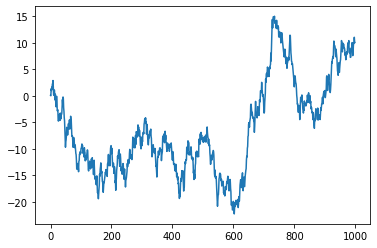

In [21]:
data = pd.Series(np.random.randn(1000),index = np.arange(1000))
data = data.cumsum()
data.plot()
plt.show()

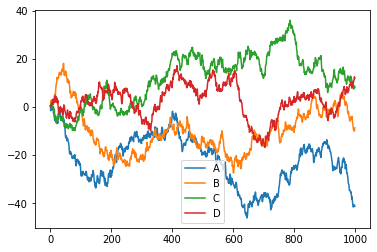

In [22]:
data = pd.DataFrame(np.random.randn(1000,4),
              index = np.arange(1000),
              columns = list("ABCD"))
data = data.cumsum()
data.plot()
plt.show()

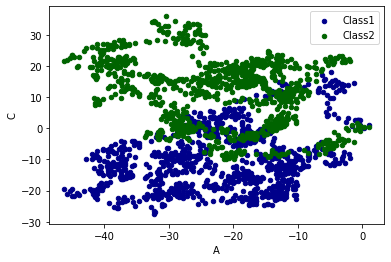

In [23]:
ax = data.plot.scatter(x ='A', y = 'B',color = 'DarkBlue',label='Class1')
data.plot.scatter(x= 'A',y='C',color = 'DarkGreen',label ='Class2',ax=ax)
plt.show()

In [24]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

from sklearn.model_selection import cross_val_score

import matplotlib.pyplot as plt

iris = load_iris()
X = iris.data
y = iris.target

# 使用交叉验证
# knn = KNeighborsClassifier(n_neighbors = 5)
# scores = cross_val_score(knn, X, y, cv =5,scoring = 'accuracy')
# print(scores.mean())

# 不使用交叉验证
# X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=4)
# knn =KNeighborsClassifier(n_neighbors = 5)
# knn.fit(X_train,y_train)

# print(knn.score(X_test,y_test))

# 测试n_neighbors参数哪个测试结果较为准确，如果要测试model的话，需要切换knn这个参数
k_range = range(1,31)
k_scores = []

for k in k_range:
    knn = KNeighborsClassifier(n_neighbors = k)
    scores = cross_val_score(knn, X, y, cv =10,scoring = 'accuracy') # for classification 精确度越高越好
    # loss = -cross_val_score(knn, X, y, cv =10,scoring = 'neg_mean_squared_error') # for regression 误差越小越好
    k_scores.append(scores.mean())
    
plt.plot(k_range,k_scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Cross-Validated Accuracy')
plt.show()

ModuleNotFoundError: No module named 'sklearn'

In [ ]:
# 解决overfitting问题

from sklearn.model_selection import learning_curve
from sklearn.datasets import load_digits
from sklearn.svm import SVC
import matplotlib.pyplot as plt
import numpy as np

from sklearn.model_selection import validation_curve

digits = load_digits()
X = digits.data
y = digits.target

# train_sizes,train_loss,test_loss = learning_curve(SVC(gamma=0.001),X,y,cv = 10, scoring = 'neg_mean_squared_error',
#                                                  train_sizes = [0.1,0.25,0.5,0.75,1])

param_range = np.logspace(-6,-2.3,5)
train_loss,test_loss = validation_curve(SVC(),X,y,param_name = 'gamma',param_range = param_range,cv = 10, scoring = 'neg_mean_squared_error')
train_loss_mean = -np.mean(train_loss,axis = 1)
test_loss_mean = -np.mean(test_loss,axis = 1)

plt.plot(param_range,train_loss_mean,'o-',color='red',label = 'Traning')
plt.plot(param_range,test_loss_mean,'o-',color='green',label='Cross-validation') #直观地看出是否出现overfitting问题

plt.xlabel('Gamma')
plt.ylabel('Loss')
plt.legend(loc='best')
plt.show()

In [ ]:
#保存model

from sklearn import svm
from sklearn import datasets



# 方法一：pickle

import pickle

# 将model保存在clf.pickle文件中

# clf = svm.SVC()
# iris = datasets.load_iris()
# X,y = iris.data,iris.target
# clf.fit(X,y)
# with open('Downloads/clf.pickle','wb') as f:
#     pickle.dump(clf,f)

# 读取clf.pickle文件

# with open('DownLoads/clf.pickle','rb') as f:
#     clf2 = pickle.load(f)
#     print(clf.predict(X[0:1]))

# 方法二： joblib

import joblib

# 将model保存在clf.pickle文件中
clf = svm.SVC()
iris = datasets.load_iris()
X,y = iris.data,iris.target
clf.fit(X,y)

# save
# joblib.dump(clf,'DownLoads/clf.pickle')

# restore
clf3 = joblib.load('DownLoads/clf.pickle')
print(clf3.predict(X[0:1]))